# Subtask 1

In [84]:
from sklearn import datasets
import pandas as pd

In [85]:
data = datasets.load_iris(as_frame=True)
pandas_frame = data['frame']

In [86]:
pandas_frame.head() # show how data looks

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
three_columns = pandas_frame.iloc[: , :3]

three_columns.head() # first 3 columns

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


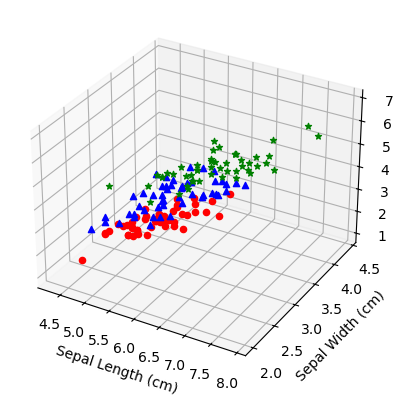

In [88]:
import matplotlib.pyplot as plt
import numpy as np


markers = {0 : "o", 1 : "^", 2 :"*", 3 :"#"}
colors = {0 : "red", 1 : "blue", 2 :"green", 3 :"yellow"}

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# it's not recommended to iterate over a pandas dataframe that's why we will iterate through a numpy array
data_array = pandas_frame.to_numpy()

for row in data_array:
    x = row[0]
    y = row[1]
    z = row[2]
    m = markers[int(row[4])]
    c = colors[int(row[4])]
    ax.scatter(x, y, z, marker=m, color=c)


ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal length (cm)')

plt.show()

In [89]:
# PCA Scratch implementation from SMLH
class myPCA:
    def __init__(self, n_components : int = 2 , method : str = 'svd') -> None:
        '''
        The constructor of the PCA algorithm.
        :param n_compoents: int, default = 2
        The dimension to which the data will be
        reduced.
        :param method: str, default = 'svd'
        The method used by PCA to reduce the
        dimensionality of the data.
        '''
        
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"’{method}’ is not a method implemented in this model")
        
    def fit(self, X : 'np.array'):
        '''
        The fitting method.
        :param X: np.array
        The data on which we want to fit the PCA
        '''
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
            
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            
            #    Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            
            # Sorting the list of tuples (eigenvalue,eigenvector)
            self.eig_pairs = [
                (np.abs(self.eig_vals[i]),self.eig_vecs[:, i]) for i in range(len(self.eig_vals))
            ]
            
            self.eig_pairs.sort(key=lambda x: x[0], reverse=True)
            
            # Calculating the explained ration
            total = sum(self.eig_vals)
            self.explained_variance_ratio = [(i/total)* 100 for i in sorted(self.eig_vals, reverse= True)]
            self.cumulative_variance_ratio = np.cumsum(self.explained_variance_ratio)
            
            # Creating the projection matrix
            self.matrix_w = np.hstack([self.eig_pairs[i][1].reshape(np.size(X, 1),1) for i in range(self.__n_components)])
        return self
    
    def transform(self, X : 'np.array') -> 'np.array':
        '''
        The transform function.
        :param X: np.array
        The data that we must reduce.
        '''
        
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w)

In [90]:
# instancing scratch implementation

pca_scratch_eigen = myPCA(method='eigen') 
pca_scratch_svd = myPCA(method='svd')

In [91]:
# instancing sklearn implementation
from sklearn.decomposition import PCA

pca_sklearn = PCA(n_components=2) 

In [92]:
# applying scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=data['data'].to_numpy())

data_scaled_X = scaler.transform(data['data'].to_numpy()) 

In [93]:
# train eigen scratch
pca_scratch_eigen.fit(data_scaled_X)
pca_scratch_eigen_transformed = pca_scratch_eigen.transform(data_scaled_X)

In [94]:
# train svd scratch

pca_scratch_svd.fit(data_scaled_X)
pca_scratch_svd_transformed = pca_scratch_svd.transform(data_scaled_X)

In [95]:
# train sklearn
pca_sklearn.fit(data_scaled_X)
pca_sklearn_transformed = pca_sklearn.transform(data_scaled_X)

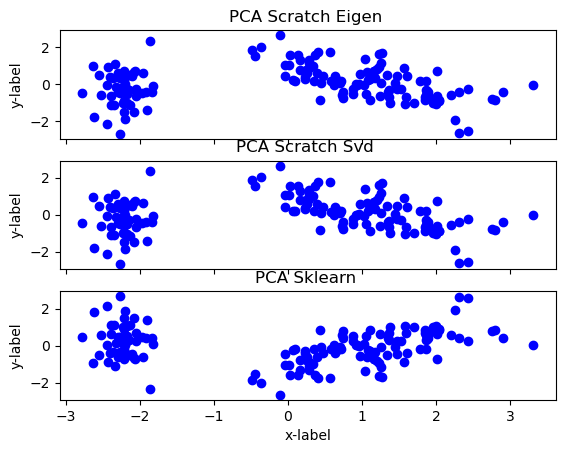

In [96]:

fig, axs = plt.subplots(3)
axs[0].plot(pca_scratch_eigen_transformed[: ,0], pca_scratch_eigen_transformed[:, 1], 'bo')
axs[0].set_title('PCA Scratch Eigen ')

axs[1].plot(pca_scratch_svd_transformed[: ,0], pca_scratch_svd_transformed[:, 1], 'bo')
axs[1].set_title('PCA Scratch Svd ')

axs[2].plot(pca_sklearn_transformed[: ,0], pca_sklearn_transformed[:, 1], 'bo')
axs[2].set_title('PCA Sklearn ')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


I don't know what conclusions could be driven from this plot. It's clear that all the methods gives approximately the same results the only difference is that sklearn results are inverse upside down. And as I understand it separated into 2 distinct features the one from the left and the right.

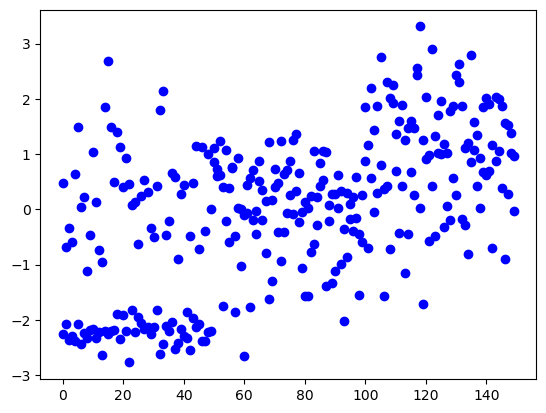

In [97]:
# retraining sklearn with n_components=1

pca_sklearn_1 = PCA(n_components=1)
pca_sklearn_1.fit(data_scaled_X)
pca_sklearn_transformed_1 = pca_sklearn.transform(data_scaled_X)

plt.plot(pca_sklearn_transformed_1, "bo")

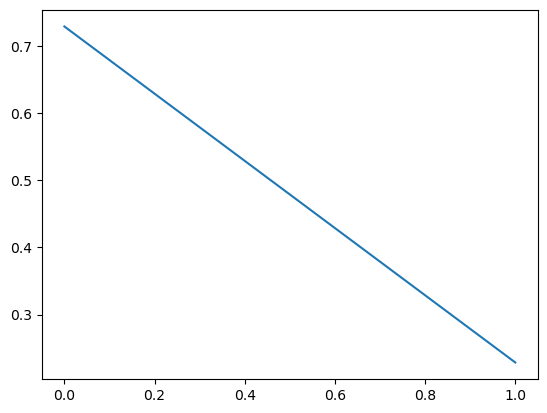

In [98]:
plt.plot(pca_sklearn.explained_variance_ratio_)

It goes down. [It do go down](https://www.youtube.com/watch?v=DYzT-Pk6Ogw). But seriously no idea what it means.

# Subtask 2

In [99]:
data = datasets.load_digits(as_frame=True)

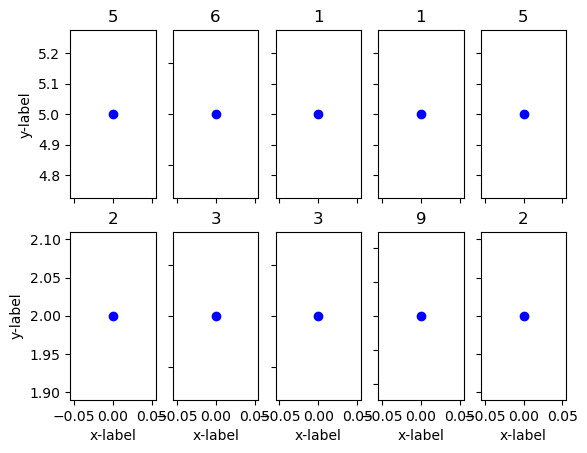

In [100]:
# plot in a multiple window plot 10 random digits with a title having the digit from the image on a 2 x 5 grid

random_numbers = np.random.randint(10 ,size=(2,5)) # generate a np.array of 2x5 with random integers from 0 to 9999

fig, axs = plt.subplots(2,5)

for (x, y), value  in np.ndenumerate(random_numbers): # for every item in array
    # x and y is the position of the value in array and I will use it for position in plot grid
    axs[x, y].plot(value, 'bo') 
    axs[x, y].set_title(str(value)) # set name of plot

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [101]:
sklearn_PCA = PCA(n_components=2) # creating an instance of PCA

In [102]:
# applying scaling 
scaler = StandardScaler()
scaler.fit(data['data'].to_numpy()) 

data_scaled_X = scaler.transform(data['data'].to_numpy())

In [103]:
# training and applying PCA transform 
sklearn_PCA.fit(data_scaled_X)

digits_transformed = sklearn_PCA.transform(data_scaled_X) 

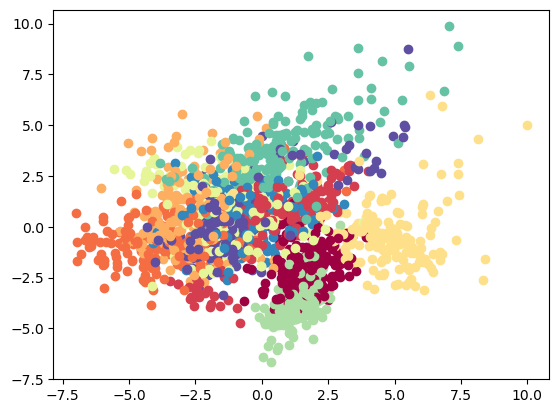

In [104]:
fig, ax = plt.subplots()

colors = [
    "#9e0142", # 0
    "#d53e4f", # 1
    "#f46d43", # 2
    "#fdae61", # 3
    "#fee08b", # .
    "#e6f598", # .
    "#abdda4", # .
    "#66c2a5",
    "#3288bd",
    "#5e4fa2",
    "#ffffff", # 9
]

for i in range(digits_transformed.shape[0]): # iterate in range of total rows
    row = digits_transformed[i] # getting values of row
    target = data['target'][i] # getting the digit
    ax.plot(row[0], row[1], 'o', color=colors[target]) # 
    
plt.show()